# Loi de Benford

$X$  est la variable aléatoire donnant le premier chiffre significatif d'un nombre choisi au hasard dans un ensemble de données.

Pour $c \in \{ 1,2,3,4,5,6,7,8,9 \}$, $$P(X=c) = \log \left( 1+ \frac{1}{c} \right) = \log(c+1) - \log(c)$$
où $\log$ est le logarithme décimal.

In [1]:
from math import log
# NB :  en python, log désigne le logarithme neperien ln
# le logarithme decimal vaut log(x) = ln(x)/ln(10)

print("c","log(c)")
for c in range(1,10):
    print(c ,  log(1+1/c)/log(10))

c log(c)
1 0.30102999566398114
2 0.17609125905568124
3 0.1249387366082999
4 0.0969100130080564
5 0.0791812460476248
6 0.06694678963061322
7 0.057991946977686726
8 0.051152522447381284
9 0.04575749056067514


In [2]:
def benford(k):
    return log(1+1/k)/log(10)
    
for i in range(1,10):
    print(benford(i))

0.30102999566398114
0.17609125905568124
0.1249387366082999
0.0969100130080564
0.0791812460476248
0.06694678963061322
0.057991946977686726
0.051152522447381284
0.04575749056067514


## création d'une procédure d'affichage (diagramme en bâtons)

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 

def comparaisonBenford(L):
    # comparaison de la liste L avec la liste generee par benford()
    data = []
    for i in range(1,10):
        data = data + [[i,L[i],benford(i)]]
    df = pd.DataFrame(data,columns=["chiffre","L","Benford"])
    df.plot(x="chiffre", y=["L", "Benford"], kind="bar",figsize=(9,8))
    plt.show()

In [4]:
def chiffreSignificatif(n):
    #retourne le premier (en partant de la gauche) chiffre non nul du nombre  n
    #n peut être un décimal positif ou négatif
    # si n=0, retourne 0
    chiffres = {'1','2','3','4','5','6','7','8','9'}
    p = '0'
    k = 0
    nchaine = str(n)
    lchaine = len(nchaine)
    while (k < lchaine) and (p not in chiffres):
        p = nchaine[k] 
        if p in chiffres:
            p = nchaine[k]
        else:
            p = 0   #résout le cas  de 0 seul  suivi d un autre caractere comme /n 
        k = k+1
    return int(p)

In [5]:
chiffreSignificatif(700),chiffreSignificatif(5.578),chiffreSignificatif(-124785.700),chiffreSignificatif(0.0075700),chiffreSignificatif(0.00000002),chiffreSignificatif(0)

(7, 5, 1, 7, 2, 0)

## fréquence des chiffres significatifs dans  n*n produits (d'entiers aléatoires entre 1 et n)

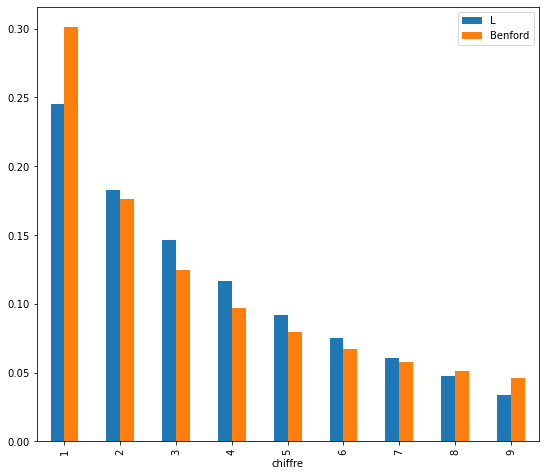

In [6]:
from random import randint

def frequenceChiffresSignificatifs(n):
    # retourne la liste L des frequences d apparitions de chaque chiffre significatif
    L = [0]*10
    for i in range(n):
        ri = randint(1,n)
        for j in range(n):
            p = chiffreSignificatif(ri * randint(1,n))
            L[p] = L[p] + 1
        
    for k in range(10):
        L[k] = L[k]/(n**2)
    return L
    
    

    
frequenceChiffresSignificatifs(1000)
comparaisonBenford(frequenceChiffresSignificatifs(1000))

## fréquence des chiffres significatifs dans  n entiers aléatoires entre 1 et 10000n)

[0.0, 0.124, 0.101, 0.117, 0.097, 0.102, 0.11, 0.124, 0.126, 0.099]


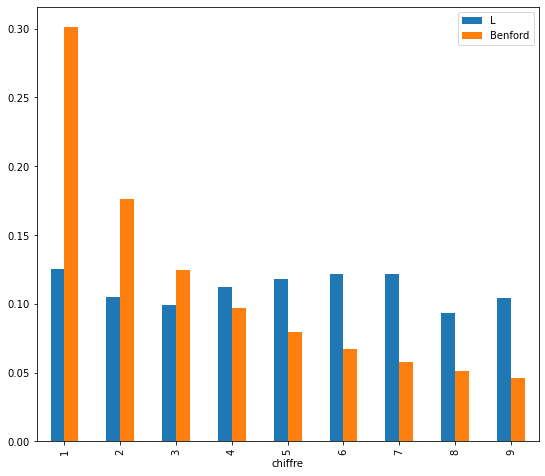

In [7]:
from random import randint

def frequenceChiffresSignificatifs(n):
    # retourne la liste L des frequences d apparitions de chaque chiffre significatif
    L = [0]*10
    N = 10000*n
    for i in range(n):
        p = chiffreSignificatif(randint(1,N))
        L[p] = L[p] + 1
        
    for k in range(10):
        L[k] = L[k]/(n)
    return L
    
    

    
print(frequenceChiffresSignificatifs(1000))
comparaisonBenford(frequenceChiffresSignificatifs(1000))

## population des 207 communes de Loire Atlantique en 2017

source : https://www.insee.fr/fr/statistiques/4265439?sommaire=4265511
        

207
[0.0, 0.24154589371980675, 0.21256038647342995, 0.16908212560386474, 0.12077294685990338, 0.043478260869565216, 0.06280193236714976, 0.07246376811594203, 0.043478260869565216, 0.033816425120772944]


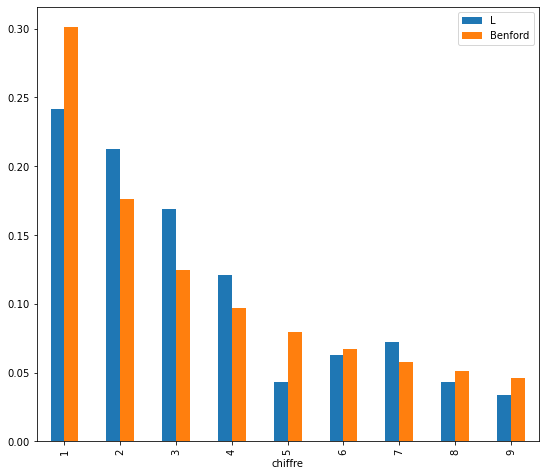

In [8]:
fichierDonnees = open("communesLoireAtlantique2017.txt", "r")
L = [0]*10
nombreDonnees = 0

for ligne in fichierDonnees:
    p = chiffreSignificatif(ligne)
    L[p] = L[p] + 1
    nombreDonnees = nombreDonnees + 1
fichierDonnees.close()

for k in range(10):
    L[k] = L[k]/(nombreDonnees)

print(nombreDonnees)
print(L)
comparaisonBenford(L)


## population des 34995 communes de France et DOM en 2017

source : https://www.insee.fr/fr/statistiques/4265429?sommaire=4265511

34995
[0.00017145306472353194, 0.304643520502929, 0.17991141591655951, 0.12653236176596658, 0.09149878554079154, 0.08018288326903844, 0.068495499357051, 0.05675096442348907, 0.049035576510930136, 0.04277753964852122]


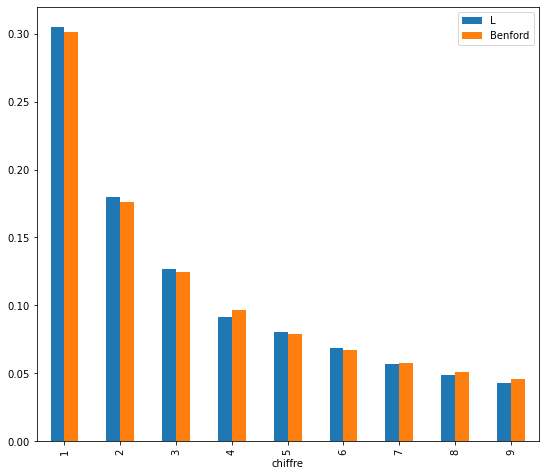

In [9]:
fichierDonnees = open("communesFrance2017.txt", "r")
L = [0]*10
nombreDonnees = 0

for ligne in fichierDonnees:
    p = chiffreSignificatif(ligne)
    L[p] = L[p] + 1
    nombreDonnees = nombreDonnees + 1
    
fichierDonnees.close()

for k in range(10):
    L[k] = L[k]/(nombreDonnees)

print(nombreDonnees)
print(L)
comparaisonBenford(L)

## suite de Fibonacci

Cette suite $(u_n)$ est définie pour tout entier naturel $n$ par :
\begin{align*}
& u_0 = 1\\
&u_1 = 1\\
&\text{et pour tout }n \in \mathbb{N},\qquad  u_{n+2} = u_{n+1} + u_n
\end{align*}

(en clair : chaque terme est la somme des deux précédents et on part de 1 et 1).

Ecrire une fonction qui prend n en entrée et retourne la fréquence des chiffres significatifs des n premiers termes de la suite de Fibonacci.

[0.0, 0.30116988301169884, 0.17618238176182383, 0.12498750124987501, 0.09679032096790322, 0.07929207079292071, 0.06679332066793321, 0.05799420057994201, 0.051394860513948606, 0.04559544045595441]


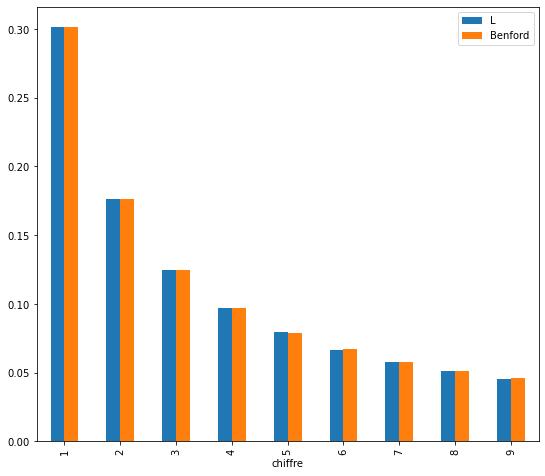

In [10]:
def fibo(n):
    L = [0]*10
    un = 1
    unplus1 = 1
    L[1] = 2
    for i in range(n):
        unplus2 = un + unplus1
        p = chiffreSignificatif(unplus2)
        L[p] = L[p] + 1
        un = unplus1
        unplus1 = unplus2
        
    for k in range(10):
        L[k] = L[k]/(n)
    return L

aux = fibo(10001)
print(aux)
# print(benford())
comparaisonBenford(aux)

# suite des factorielles

Pour tout entier naturel $n$, 
$$n ! = 1 \times 2 \times 3 \times 4 \times \dots \times n$$
$n!$ se lit "factorielle $n$".

Exemples :
\begin{align*}
&1 ! =1\\
&2 ! = 1 \times 2 = 2\\
&3! = 1 \times 2 \times 3  = 6\\
&5! = 1 \times 2 \times 3 \times 4 \times 5  = 120
\end{align*}

[0.0, 0.2956, 0.1788, 0.1276, 0.0963, 0.0794, 0.0715, 0.0571, 0.051, 0.0426]


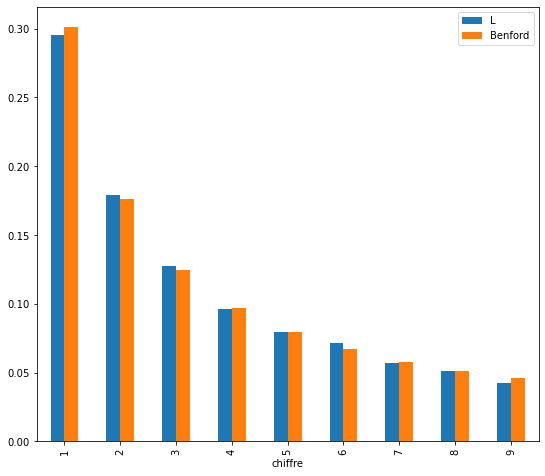

In [11]:
def fact(n):
    L = [0]*10
    f = 1
    L[1] = 1
    for i in range(2,n):
        f = f*i
        p = chiffreSignificatif(f)
        L[p] = L[p] + 1
        
        
    for k in range(10):
        L[k] = L[k]/(n)
    return L

aux = fact(10000)
print(aux)
# print(benford())
comparaisonBenford(aux)

## suite géométrique 

$(u_n)$ est définie pour tout entier naturel $n$ par :
\begin{align*}
& u_0 = 3\\
&\text{et pour tout }n \in \mathbb{N},\qquad  u_{n+1} = 1.2 \times u_{n}
\end{align*}

[0.0, 0.3, 0.176, 0.127, 0.096, 0.079, 0.067, 0.058, 0.052, 0.045]


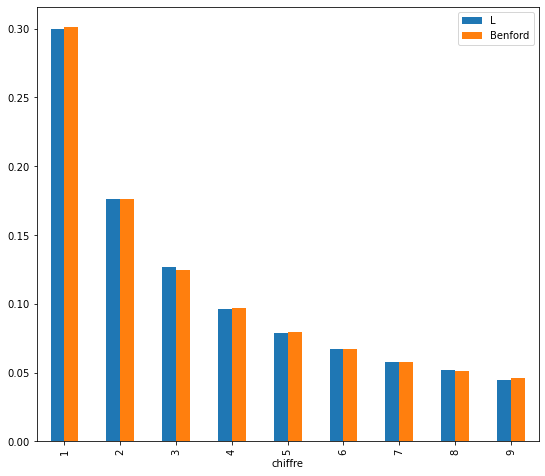

In [12]:
def geom(n):
    L = [0]*10
    u = 3
    L[3] = 1
    for i in range(1,n):
        u = u*1.2
        p = chiffreSignificatif(u)
        L[p] = L[p] + 1
        
        
    for k in range(10):
        L[k] = L[k]/(n)
    return L

aux = geom(1000)
print(aux)
# print(benford())
comparaisonBenford(aux)